## 1 Вибірка

Імпорт бібліотек

In [44]:
import numpy as np
import matplotlib.pyplot as plt

Вивід вибірки для аналізу


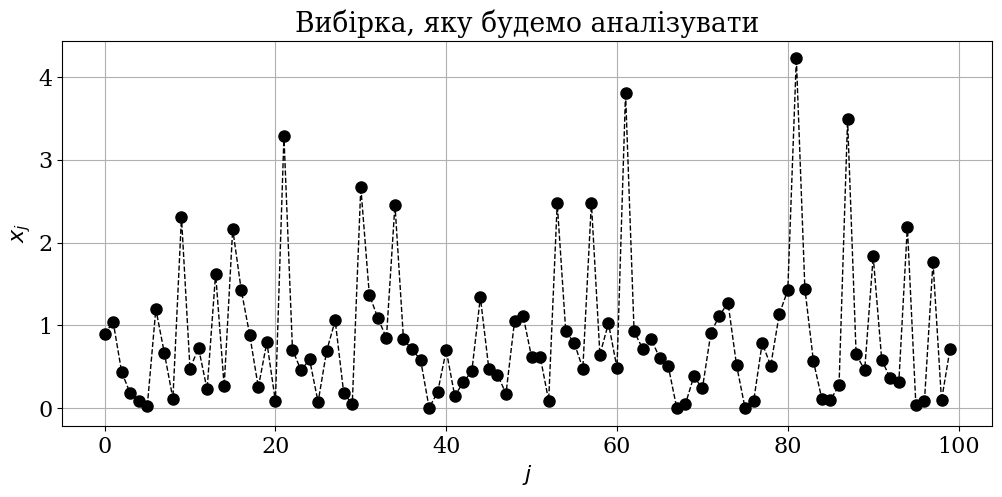

In [56]:
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})

x = np.loadtxt('Lb1_10_1.prn')

plt.figure(figsize=(12,5))

plt.plot(x[0:100], 'ko--', linewidth=1, markersize=8)

plt.title('Вибірка, яку будемо аналізувати')
plt.xlabel('$j$')
plt.ylabel('$x_j$')

plt.grid()
plt.show()

Найбільше і найменше значення вибірки


In [46]:
print(f"Найменше значення: {np.min(x)}")
print(f"Найбільше значення: {np.max(x)}")

Найменше значення: 0.001394
Найбільше значення: 6.433


Гістограма вибірки

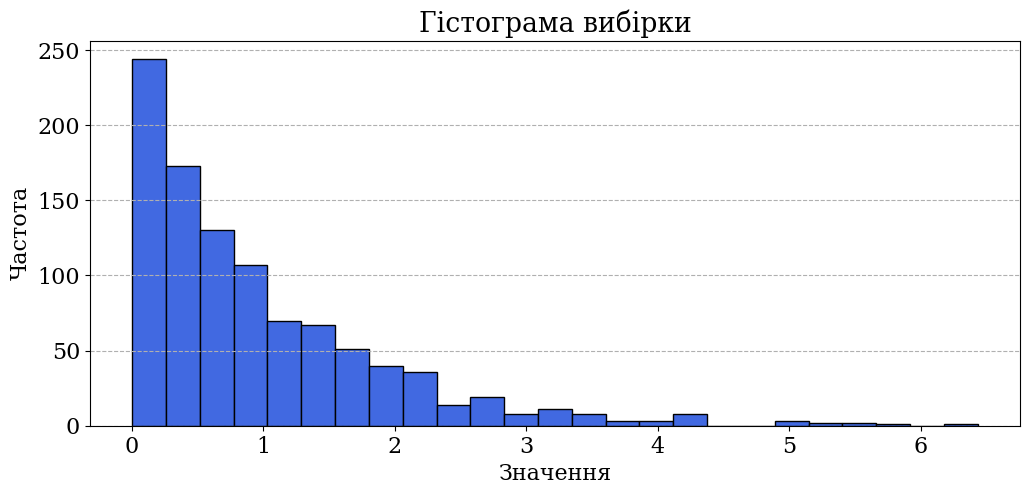

In [47]:
plt.figure(figsize=(12, 5))
plt.hist(x, bins=25, color='royalblue', edgecolor='black')

plt.title('Гістограма вибірки')
plt.xlabel('Значення')
plt.ylabel('Частота')

plt.grid(axis='y', linestyle='--')
plt.show()

Щільність

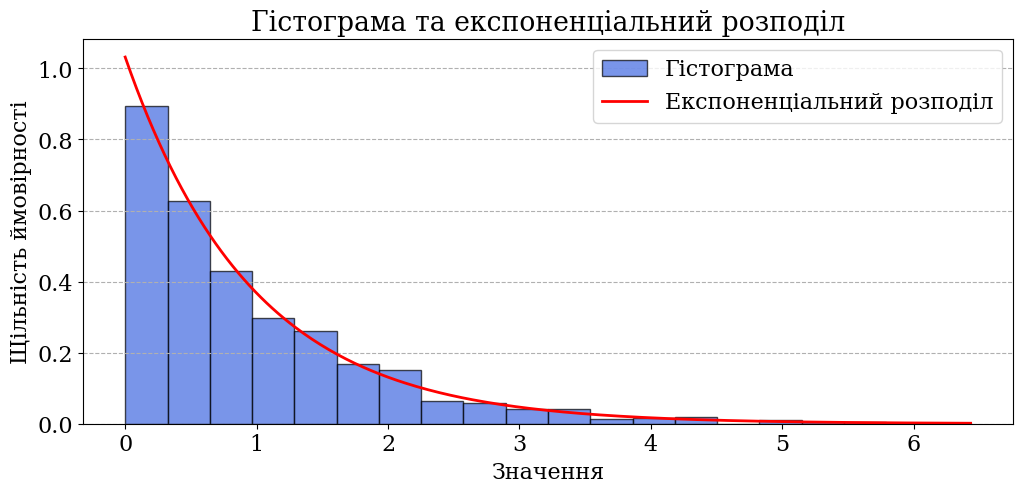

In [48]:
from scipy.stats import expon

lambda_hat = 1 / np.mean(x)

plt.figure(figsize=(12, 5))
plt.hist(x, bins=20, density=True, color='royalblue', edgecolor='black', alpha=0.7, label='Гістограма')

x_vals = np.linspace(0, np.max(x), 300)
plt.plot(x_vals, expon.pdf(x_vals, scale=1/lambda_hat), 'r-', lw=2, label='Експоненціальний розподіл')

plt.title('Гістограма та експоненціальний розподіл')
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.show()


Параметр Лямбда

In [49]:
import numpy as np

lambda_hat = 1 / np.mean(x)

print(f"Оцінка параметра λ: {lambda_hat:.4f}")


Оцінка параметра λ: 1.0320


Ксі^2

In [50]:
from scipy.stats import expon, chi2


bins = 20
observed, bin_edges = np.histogram(x, bins=bins)

expected = len(x) * (expon.cdf(bin_edges[1:], scale=1/lambda_hat) - expon.cdf(bin_edges[:-1], scale=1/lambda_hat))

chi2_stat = np.sum((observed - expected)**2 / expected)

df = bins - 1 - 1

chi2_crit = chi2.ppf(0.95, df) 
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"χ²-статистика: {chi2_stat:.4f}")
print(f"Критичне значення (α = 0.05): {chi2_crit:.4f}")
print(f"P-значення: {p_value:.4f}")

if chi2_stat > chi2_crit:
    print("Відхиляємо H₀: Вибірка не відповідає експоненціальному розподілу.")
else:
    print("Не відхиляємо H₀: Вибірка відповідає експоненціальному розподілу.")


χ²-статистика: 15.5586
Критичне значення (α = 0.05): 28.8693
P-значення: 0.6233
Не відхиляємо H₀: Вибірка відповідає експоненціальному розподілу.


### 2 ВИБІРКА

Вибірка для аналізу

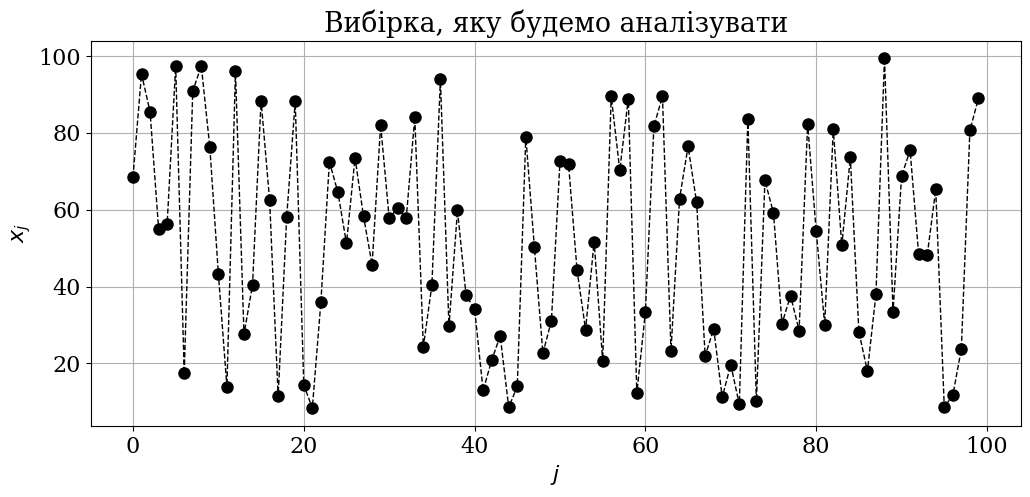

In [51]:
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})

x = np.loadtxt('Lb1_10_2.prn')

plt.figure(figsize=(12,5))

plt.plot(x[0:100], 'ko--', linewidth=1, markersize=8)

plt.title('Вибірка, яку будемо аналізувати')
plt.xlabel('$j$')
plt.ylabel('$x_j$')

plt.grid()
plt.show()

Найбільше та найменше значення

In [52]:
print(f"Найменше значення: {np.min(x)}")
print(f"Найбільше значення: {np.max(x)}")

Найменше значення: 8.164
Найбільше значення: 99.79


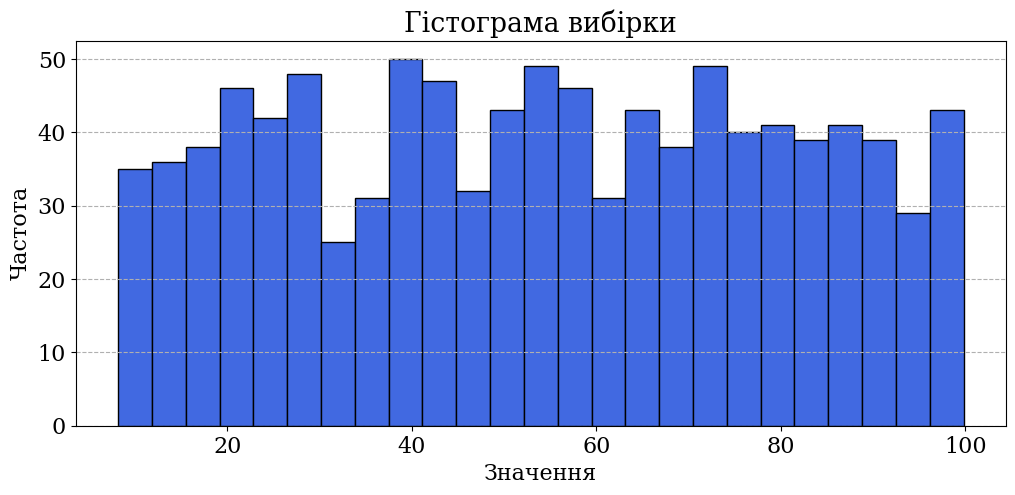

In [53]:
plt.figure(figsize=(12, 5))
plt.hist(x, bins=25, color='royalblue', edgecolor='black')

plt.title('Гістограма вибірки')
plt.xlabel('Значення')
plt.ylabel('Частота')

plt.grid(axis='y', linestyle='--')
plt.show()

Щільність

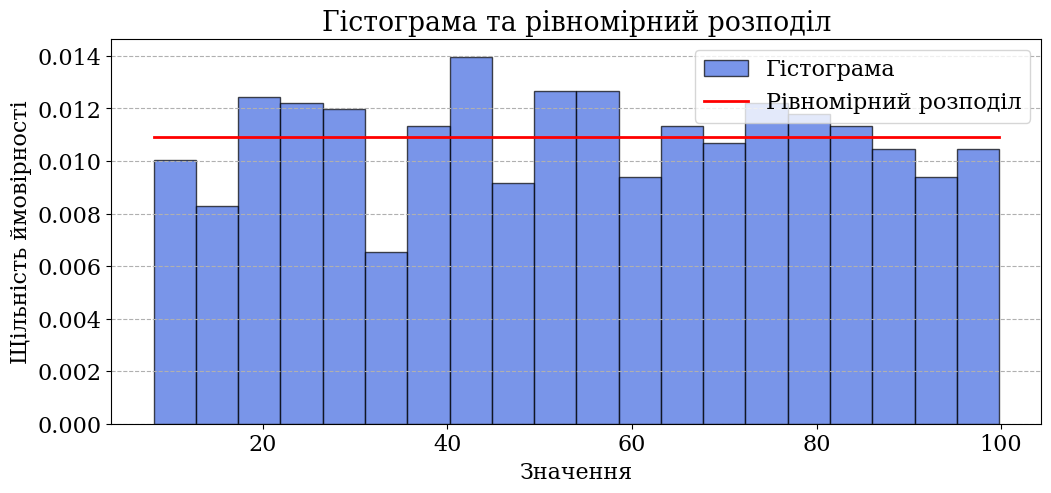

In [54]:
from scipy.stats import uniform

a, b = np.min(x), np.max(x)

# Побудова гістограми
plt.figure(figsize=(12, 5))
plt.hist(x, bins=20, density=True, color='royalblue', edgecolor='black', alpha=0.7, label='Гістограма')

x_vals = np.linspace(a, b, 300)
plt.plot(x_vals, uniform.pdf(x_vals, loc=a, scale=b-a), 'r-', lw=2, label='Рівномірний розподіл')

plt.title('Гістограма та рівномірний розподіл')
plt.xlabel('Значення')
plt.ylabel('Щільність ймовірності')
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.show()


Ксі^2

In [55]:
from scipy.stats import uniform, chi2

a = np.min(x)  
b = np.max(x)  

bins = 20
observed, bin_edges = np.histogram(x, bins=bins)

expected = len(x) * (uniform.cdf(bin_edges[1:], loc=a, scale=b - a) - uniform.cdf(bin_edges[:-1], loc=a, scale=b - a))

chi2_stat = np.sum((observed - expected)**2 / expected)

df = bins - 1 - 2

chi2_crit = chi2.ppf(0.95, df)
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"χ²-статистика: {chi2_stat:.4f}")
print(f"Критичне значення (α = 0.05): {chi2_crit:.4f}")
print(f"P-значення: {p_value:.4f}")

if chi2_stat > chi2_crit:
    print("Відхиляємо H₀: Вибірка не відповідає рівномірному розподілу.")
else:
    print("Не відхиляємо H₀: Вибірка відповідає рівномірному розподілу.")


χ²-статистика: 24.5544
Критичне значення (α = 0.05): 27.5871
P-значення: 0.1051
Не відхиляємо H₀: Вибірка відповідає рівномірному розподілу.
